In [3]:
from imports import *
from exactDiagMethods import build_exact_diag_hamiltonian, perform_exact_diag
from globalMethods import  build_initial_states, output_results
from vqteMethods import hamiltonian_generation, perform_vqte

# Make everything work with eps list
# Comment and delete old methods
# Make sure all imports are relevant


Exact Ham [[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 2. +0.j 0. +0.j]
 [0. +0.j 2. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 1. +0.j]]
Ham real SparsePauliOp(['ZIII', 'IIZI', 'IZII', 'IIIZ', 'XIYI', 'YIXI', 'IYIX', 'IXIY', 'XXII', 'IIXX', 'YYII', 'IIYY'],
              coeffs=[ 0.25      +0.j, -0.25      +0.j,  0.25      +0.j, -0.25      +0.j,
 -0.00249967+0.j, -0.00249967+0.j,  0.025     +0.j,  0.025     +0.j,
 -1.        +0.j,  1.        +0.j, -1.        +0.j,  1.        +0.j])
Ham imag SparsePauliOp(['XIXI', 'YIYI', 'IIII', 'ZIII', 'IIZI', 'IXIX', 'IYIY', 'IIII', 'IZII', 'IIIZ'],
              coeffs=[-0.125     +0.j,  0.125     +0.j,  0.25      +0.j, -0.00249967+0.j,
 -0.00249967+0.j, -0.025     +0.j,  0.025     +0.j,  0.05      +0.j,
  0.025     +0.j,  0.025     +0.j])
Exact diag initial: -9.797174393178812e-16
Exact diag initial: -9.797174393178816e-16
Exact step  1  out of 200
Exact step  2  out of 200
Exact step  3  out of 200
Exact step  4  out of 200
Exact ste

C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


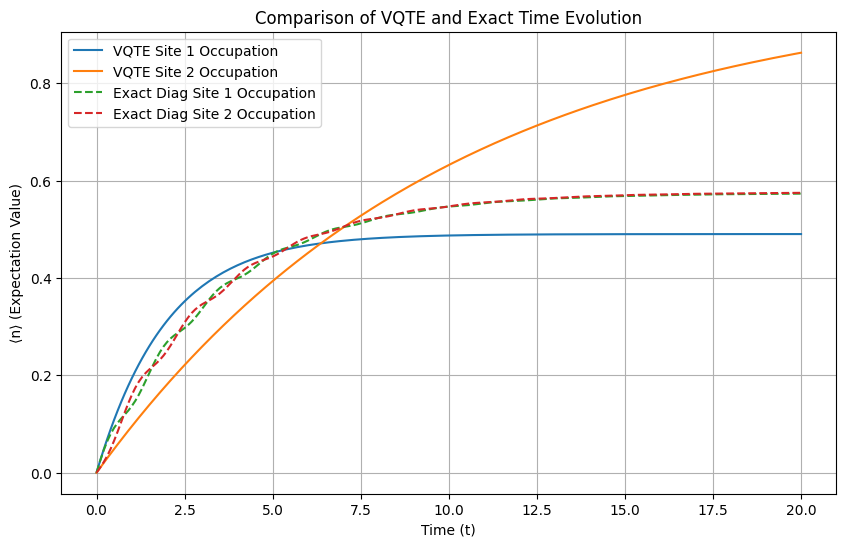

In [4]:
# def main():
# Initialize the simulation parameters
N = 2

gamma_L= 0.5
gamma_R = 0.1

eps = 0.5

mu_L= 0.1
mu_R= 5

T_L = 10
T_R= 0.1

beta_L=1/T_L
beta_R=1/T_R
F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)

J = 1

eps_list = []

for i in range(N):
    eps_list.append(0.5)


time = 20
dt = 0.1
nt = int(time/dt)



exact_diag_ham = build_exact_diag_hamiltonian(J, eps_list)

print("Exact Ham", exact_diag_ham)


ham_real, ham_imag = hamiltonian_generation(N, eps_list, gamma_L, gamma_R, F_L, F_R,J)


print("Ham real", ham_real)

print("Ham imag", ham_imag)

hopping_ham = SparsePauliOp(["XXII", "YYII", "IIXX", "IIYY"], coeffs=[J, J, -J, -J])



vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)

exact_diag_results, superoperator = perform_exact_diag(gamma_L, F_L, gamma_R, F_R, dt, nt, exact_diag_init_state,exact_diag_ham, N)
print(exact_diag_results)
vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values,N)

# # Output results
output_results(vqte_results, exact_diag_results, time, nt)

In [5]:
h_total = superoperator * 1j
h_herm = (h_total + h_total.getH())/2
np.allclose(ham_real.to_matrix(), h_herm)

True

In [6]:
h_total = superoperator * 1j
anti_herm = (h_total - h_total.getH())/(2j)
np.allclose(ham_imag.to_matrix(), - anti_herm)

True